# Forecasting Competition Level in the Electricity Market


#### For this project, we use LSTM to predict a competion index for an elctricity market

The code we are using was taken from John Brownlee's post avai;able at:
[How to Develop LSTM Models for Time Series Forecasting](https:/https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting//)

In [0]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

#### The index we are using is to measure competition level of the market is HHI. You can learn more about it at: [FERC](https:/https://www.ferc.gov/whats-new/comm-meet/2012/021612/E-2.pdf/)


#### The indices are collected from: [IGMC](https:/https://www.igmc.ir/Electronic-Services/Power-Market-Deputy/Reports/)

In [0]:
# define input sequence
raw_seq = [0.0487, 0.0468, 0.0482, 0.0496, 0.0497, 0.0493, 0.049, 0.0482, 0.0466, 0.0464, 0.0406, 0.0382,
           0.0397, 0.0402, 0.0419, 0.0416, 0.0388, 0.0451, 0.0408, 0.0381, 0.0409, 0.0385, 0.0389, 0.0397,
           0.04, 0.043, 0.043, 0.044, 0.046, 0.047, 0.045, 0.039, 0.03869, 0.03873, 0.0413, 0.0426,
           0.047, 0.045, 0.046, 0.047, 0.044, 0.044, 0.046, 0.043, 0.041, 0.042, 0.041, 0.042,
           0.029, 0.025, 0.024, 0.023, 0.023, 0.023, 0.025, 0.027, 0.026, 0.024, 0.0262, 0.0263,
           0.041, 0.035, 0.032, 0.033, 0.032, 0.032, 0.033, 0.036, 0.034, 0.035, 0.034, 0.038,
           0.04, 0.033, 0.032, 0.029, 0.028, 0.029, 0.031, 0.034, 0.035, 0.033, 0.038, 0.036,
           0.05, 0.034, 0.031, 0.029, 0.029, 0.028, 0.027, 0.031, 0.029, 0.028, 0.029, 0.029]
# choose a number of time steps
n_steps_in, n_steps_out = 12, 12
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [0]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [32]:
# fit model
model.fit(X, y, epochs=50, verbose=0)

In [33]:
# demonstrate prediction
x_input = array([0.05, 0.034, 0.031, 0.029, 0.029, 0.028, 0.027, 0.031, 0.029, 0.028, 0.029, 0.029])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.03582498 0.03644525 0.03532726 0.03527135 0.03499295 0.03509619
  0.03513625 0.03399025 0.03569722 0.03517024 0.03439113 0.03521688]]


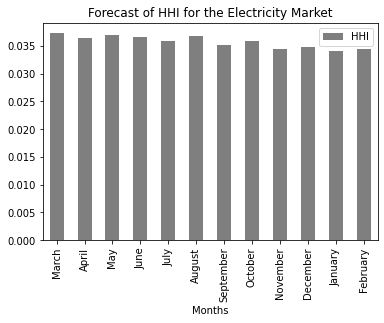

In [41]:
number_of_layers_main_effect = {'Months':['March', 'April', 'May', 'June', 'July', 'August',
                                          'September', 'October', 'November', 'December', 'January', 'February'],
                                'HHI':[0.03730208, 0.03646056, 0.03695583, 0.03656552, 0.03584157, 0.03679354,
                                       0.03519477, 0.03582986, 0.03441271, 0.03479542, 0.03408214, 0.03443348]}
df = pd.DataFrame(number_of_layers_main_effect)

df.plot(x = 'Months', y = ['HHI'], kind = 'bar', color = ['C7'])
plt.title('Forecast of HHI for the Electricity Market')
plt.show()